In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras 
import warnings

warnings.filterwarnings('ignore')
print(tf.__version__)
for model in sklearn, pd, keras, np ,mlp:
    print(model.__name__, model.__version__)

2.1.0
sklearn 0.20.2
pandas 0.24.2
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
numpy 1.17.4
matplotlib 2.1.2


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [3]:
# version 0.2 数据归一化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid = std.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test = std.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

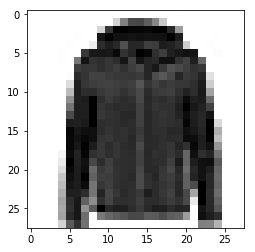

In [4]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()

show_single_image(x_train[0])

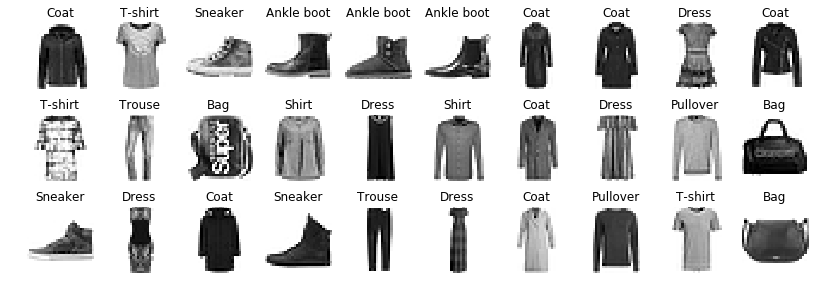

In [5]:
def show_images(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index +1)
            plt.imshow(x_data[index], cmap='binary', interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
            
class_names = ['T-shirt', 'Trouse', 'Pullover', 'Dress', 'Coat', 'Sandal', "Shirt", 'Sneaker', 'Bag', 'Ankle boot']

show_images(3, 10, x_train, y_train, class_names)

In [10]:
# tf.keras.models.Sequential()
# version dnn, 多层神经网络，循环添加层次。
model = tf.keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(10):
    model.add(keras.layers.Dense(50,activation="selu"))
    
# 添加dropout ，这里只在最后一层添加dropout,如果需要可以为每一层添加
model.add(keras.layers.AlphaDropout(0.5))
    # 添加批归一化
    # model.add(keras.layers.BatchNormalization())
"""
# 批归一化在学术界存在着争议：激活前批归一化 or 激活后批归一化
model.add(keras.layers.Dense(50))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
"""
    
model.add(keras.layers.Dense(10,activation="softmax"))

# sparse_categorical_crossentropy:  如果y是一个数，会把它转化成一个向量，如 y->index., y->one hot->[]
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [11]:
# version 0.3 回调函数
# Tensorboard, Earlystopping, Modelcheckpoint
logdir = './dnn_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2

In [13]:
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_valid, y_valid),callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.6975 - accuracy: 0.7659 - val_loss: 0.6493 - val_accuracy: 0.8500
Epoch 2/10
55000/55000 [==============================] - 4s 66us/sample - loss: 0.4956 - accuracy: 0.8337 - val_loss: 0.6175 - val_accuracy: 0.8466
Epoch 3/10
55000/55000 [==============================] - 4s 74us/sample - loss: 0.4435 - accuracy: 0.8493 - val_loss: 0.5805 - val_accuracy: 0.8688
Epoch 4/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4192 - accuracy: 0.8567 - val_loss: 0.6237 - val_accuracy: 0.8572
Epoch 5/10
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3990 - accuracy: 0.8618 - val_loss: 0.6203 - val_accuracy: 0.8622
Epoch 6/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.3783 - accuracy: 0.8678 - val_loss: 0.5614 - val_accuracy: 0.8686
Epoch 7/10
55000/55000 [==============================] -

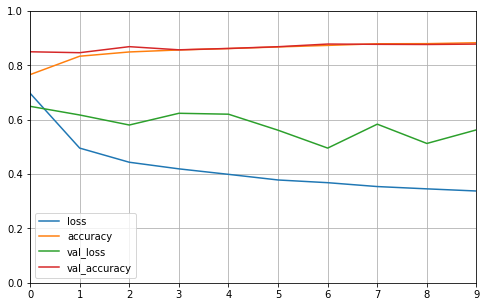

In [14]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curve(history)

In [15]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.6394 - accuracy: 0.8653


[0.6394159612223506, 0.8653]